In [1]:
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
trump = pd.read_csv("Trump\Trump_final.csv")

In [4]:
trump.head()

,Unnamed: 0,Date,SPX Open Price,SPX Volume,NYT VS (Day_Lag=-1),WSJ VS (Day_Lag=-1),CNN VS (Day_Lag=-1)
0,0,2018-08-03,2829.6201,3030390000,0.0548,0.0326,0.0843
1,1,2018-08-06,2840.2900,2874540000,0.0857,-0.0794,0.0885
2,2,2018-08-07,2855.9199,3162770000,-0.2264,0.1500,0.0163
3,3,2018-08-08,2856.7900,2972200000,-0.1794,-0.1171,-0.0294
4,4,2018-08-09,2857.1899,3047050000,0.1960,-0.1176,0.0340


In [17]:
trump_df = trump.drop("Unnamed: 0", axis=1)

In [18]:
trump_df = trump_df.set_index("Date")

In [19]:
trump_df.head()

,SPX Open Price,SPX Volume,NYT VS (Day_Lag=-1),WSJ VS (Day_Lag=-1),CNN VS (Day_Lag=-1)
Date,,,,,
2018-08-03,2829.6201,3030390000,0.0548,0.0326,0.0843
2018-08-06,2840.2900,2874540000,0.0857,-0.0794,0.0885
2018-08-07,2855.9199,3162770000,-0.2264,0.1500,0.0163
2018-08-08,2856.7900,2972200000,-0.1794,-0.1171,-0.0294
2018-08-09,2857.1899,3047050000,0.1960,-0.1176,0.0340


In [20]:
trump_sel=trump_df[['NYT VS (Day_Lag=-1)','WSJ VS (Day_Lag=-1)','CNN VS (Day_Lag=-1)']]

In [22]:
trump_df

,SPX Open Price,SPX Volume,NYT VS (Day_Lag=-1),WSJ VS (Day_Lag=-1),CNN VS (Day_Lag=-1)
Date,,,,,
2018-08-03,2829.6201,3030390000,0.0548,0.0326,0.0843
2018-08-06,2840.2900,2874540000,0.0857,-0.0794,0.0885
2018-08-07,2855.9199,3162770000,-0.2264,0.1500,0.0163
2018-08-08,2856.7900,2972200000,-0.1794,-0.1171,-0.0294
2018-08-09,2857.1899,3047050000,0.1960,-0.1176,0.0340
2018-08-10,2838.8999,3256040000,0.1003,-0.1155,0.0835
2018-08-13,2835.4600,3158450000,-0.1759,-0.0188,-0.1313
2018-08-14,2827.8799,2976970000,-0.1181,-0.0119,0.0308
2018-08-15,2827.9500,3645070000,0.1333,-0.2306,-0.0596


In [23]:
price = trump_df["SPX Open Price"]

In [24]:
volume = trump_df["SPX Volume"]

In [25]:
vs_all = trump_df.iloc[:,2:5]

## NEWS COVERAGE ABOUT TRUMP AND IT'S EFFECT ON STOCK MARKET




⁃	When newspapers are talking about “Trump”,how do the positive and negative articles (measured by vader score) impact the S&P500 stock price and transaction volume?

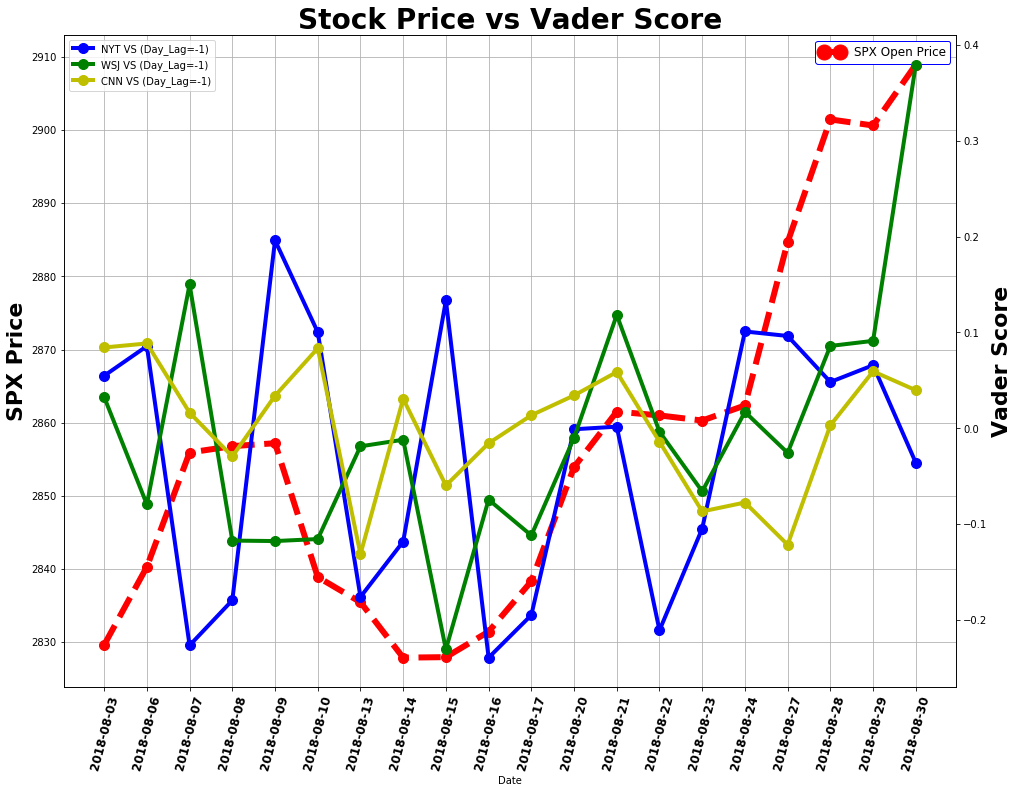

In [65]:
# plotting the graph by using object oriented plot

fig =plt.figure(figsize=(16,12))    # creating figure object
ax = fig.add_subplot(111)           # adding axes on this figure

# instantiate a second axes that shares the same x-axis

ax3 = ax.twinx()

# ploting Stock price and Vader Score on the same axis

price.plot(ax=ax, label="SPX Open Price",color="r", marker="o", markersize=10, lw=6, ls='--', alpha=1)
vs_all.plot(ax=ax3, label="Vader Score", color=["b","g","y"], marker="o",markersize=10, lw=4,ls='-',alpha=1)


# designing labile and ticks

ax.set_ylabel("SPX Price",fontdict = {"fontsize" : 22, "fontweight": "bold"})
ax3.set_ylabel("Vader Score",fontdict = {"fontsize" : 22, "fontweight": "bold"})
ax.set_xticklabels(trump_df.index, fontdict = {"fontsize" : 12, "fontweight": "bold"}, rotation=75)
ax.set_xticks(np.arange(0, 20))

# setting a title

ax.set_title("Stock Price vs Vader Score", fontdict = {"fontsize" : 28, "fontweight": "bold"})
ax.legend(numpoints = 2, frameon = True, markerscale = 1.5, edgecolor = 'blue', fontsize = '12', framealpha = 1)
ax.grid()
plt.show()


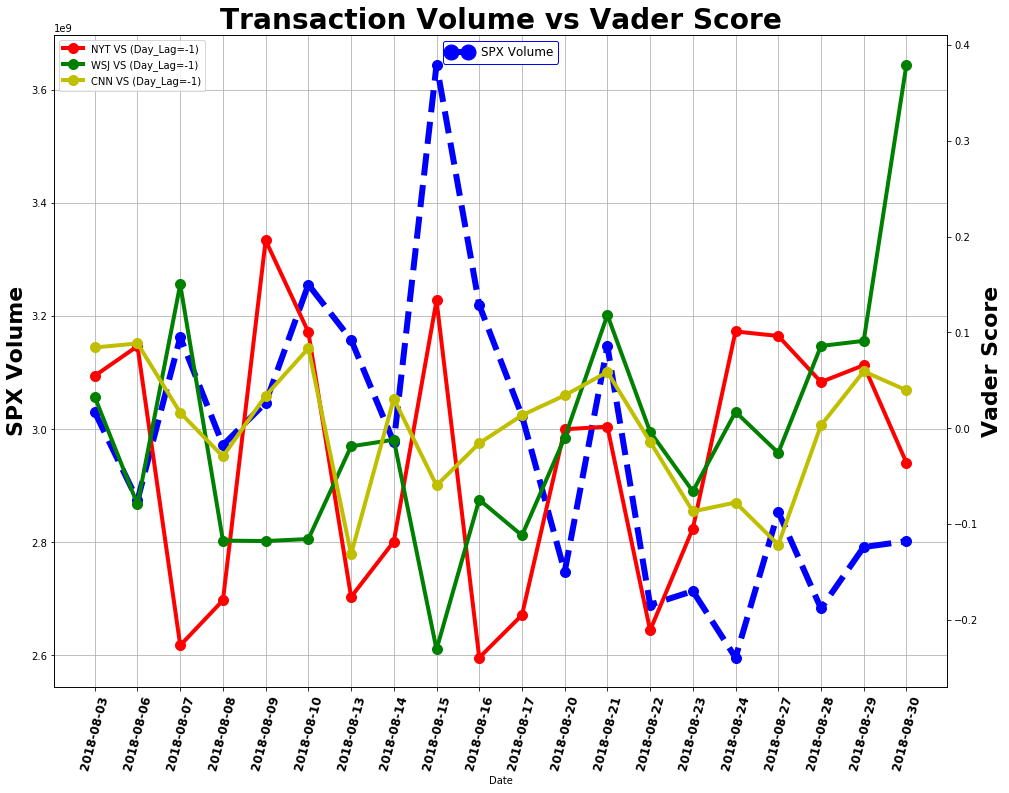

In [63]:
# plotting the graph by using object oriented plot

fig =plt.figure(figsize=(16,12))   # creating figure object
ax = fig.add_subplot(111)          # adding axes on this figure

# instantiate a second axes that shares the same x-axis

ax2 = ax.twinx()

# ploting Stock volume and Vader Score on the same axis

volume.plot(ax=ax, label="SPX Volume",color="b", marker="o", lw=6,ls='--',markersize=10, alpha=1)
vs_all.plot(ax=ax2, label="Vader Score",color=["r","g","y"], marker="o",markersize=10, lw=4,ls='-',alpha=1)

# designing labile and ticks
ax.set_ylabel("SPX Volume",fontdict = {"fontsize" : 22, "fontweight": "bold"})
ax2.set_ylabel("Vader Score",fontdict = {"fontsize" : 22, "fontweight": "bold"})
ax.set_xticklabels(trump_df.index, fontdict = {"fontsize" : 12, "fontweight": "bold"}, rotation=75)
ax.set_xticks(np.arange(0, 20))

# setting a title

ax.set_title("Transaction Volume vs Vader Score", fontdict = {"fontsize" : 28, "fontweight": "bold"})
ax.legend(numpoints = 2, frameon = True, markerscale = 1.5, edgecolor = 'blue', fontsize = '12', framealpha = 1, loc='upper center')


ax.grid()
plt.show()